In [41]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [42]:

# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")



Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [43]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

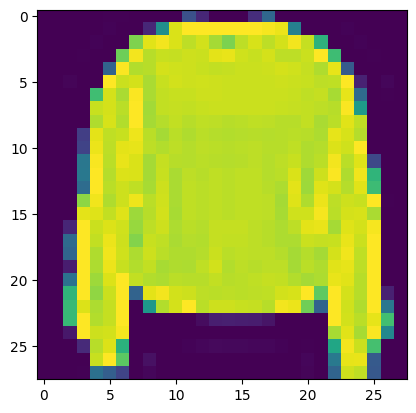

In [44]:

# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

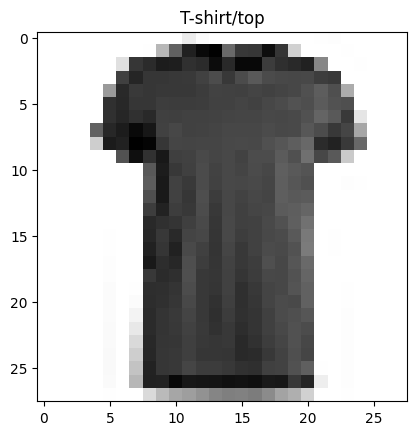

In [46]:
#Plot another example and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);


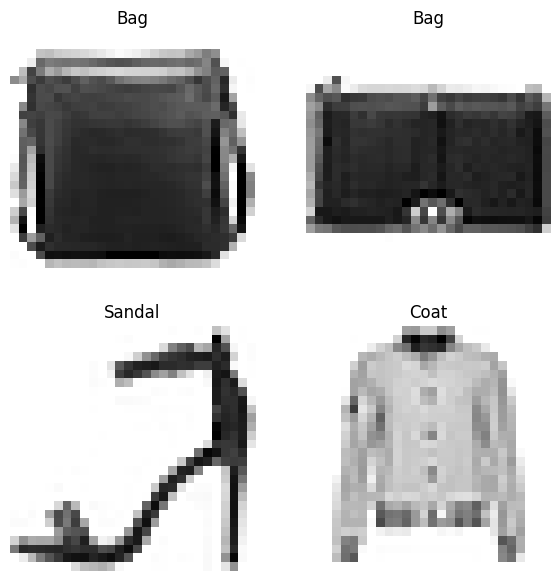

In [47]:
#Plot mulitple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

###Building multi-class classification model

* The input shape will have to deal with 28x28 tensors (the height and width of our images).

* We're actually going to squash the input into a tensor (vector) of shape (784).
The output shape will have to be 10 because we need our model to predict for 10 different classes.

* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.

* We'll need to change our loss function from a binary loss function to a multiclass loss function.

* More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().

* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [40]:
#Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4510 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3031 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3034 - accuracy: 0.1011 - val_loss: 2.3039 - val_accuracy: 0.1010
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3038 - accuracy: 0.0976 - val_loss: 2.3012 - val_accuracy: 0.1007
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3066 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2850 - accuracy: 0.1094 - val_loss: 2.2725 - val_accuracy:

In [48]:
#Check model summary
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 4)                 3140      
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
 dense_20 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural netoworks prefer data to be scaled (or normalized), this  means they like to have the numbers in the tensors they try to find patterns in between 0 and 1

In [50]:
# Divide train and test data by the maximum value (normalize it)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0


In [51]:
# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [52]:
#Now our data is normalized let's build model to find patterns

#Set random seeed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

#Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = "adam",
                metrics = ["accuracy"])

#fit the model
norm_history = model_1.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5964 - accuracy: 0.3693 - val_loss: 1.3630 - val_accuracy: 0.4381
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3102 - accuracy: 0.4609 - val_loss: 1.2596 - val_accuracy: 0.5049
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1452 - accuracy: 0.5443 - val_loss: 1.0941 - val_accuracy: 0.5603
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0262 - accuracy: 0.5841 - val_loss: 1.0006 - val_accuracy: 0.6093
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9425 - accuracy: 0.6302 - val_loss: 0.9254 - val_accuracy: 0.6483
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8852 - accuracy: 0.6558 - val_loss: 0.8875 - val_accuracy: 0.6889
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8302 - accuracy: 0.6814 - val_loss: 0.8380 - val_accuracy:

<Axes: title={'center': 'Normalized data'}>

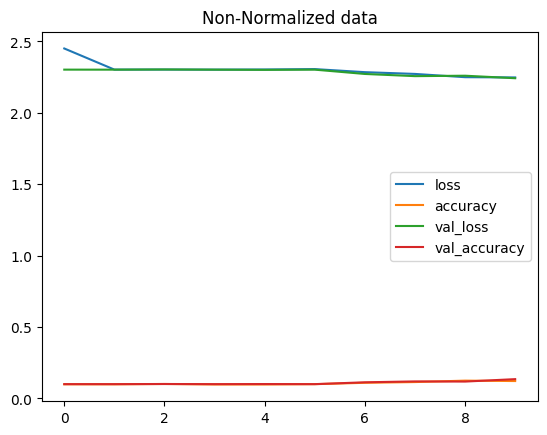

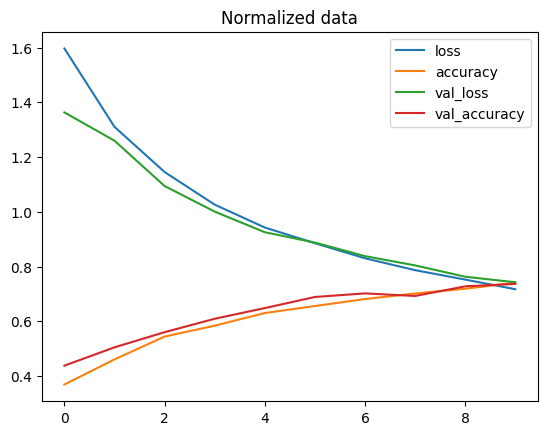

In [53]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

###Find the ideal learning rate

In [54]:
#Set random seeed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

#Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = "adam",
                metrics = ["accuracy"])

#Create learning rate callback
lr_scheduler =  tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10 **(epoch/20) )

#fit the model
find_lr_history = model_1.fit(train_data_norm,train_labels,epochs=40,validation_data=(test_data_norm,test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6898 - accuracy: 0.7598 - val_loss: 0.7154 - val_accuracy: 0.7552 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6748 - accuracy: 0.7673 - val_loss: 0.7134 - val_accuracy: 0.7533 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6608 - accuracy: 0.7693 - val_loss: 0.6901 - val_accuracy: 0.7630 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6413 - accuracy: 0.7765 - val_loss: 0.6780 - val_accuracy: 0.7683 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6147 - accuracy: 0.7837 - val_loss: 0.6412 - val_accuracy: 0.7770 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5925 - accuracy: 0.7932 - val_loss: 0.6283 - val_accuracy: 0.7877 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding ideal learning rate')

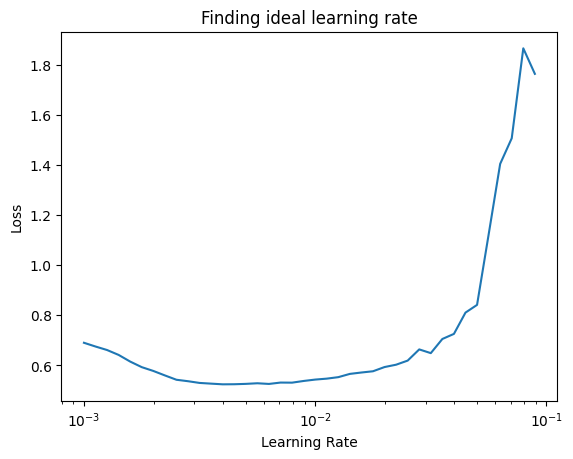

In [55]:
#Plot learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

In [62]:
#let's refit model with ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data_norm,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9958 - accuracy: 0.6179 - val_loss: 0.7259 - val_accuracy: 0.7357
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6682 - accuracy: 0.7622 - val_loss: 0.6757 - val_accuracy: 0.7671
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6129 - accuracy: 0.7865 - val_loss: 0.6418 - val_accuracy: 0.7716
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5765 - accuracy: 0.7990 - val_loss: 0.5996 - val_accuracy: 0.7889
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5533 - accuracy: 0.8069 - val_loss: 0.5785 - val_accuracy: 0.8001
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5396 - accuracy: 0.8106 - val_loss: 0.5661 - val_accuracy: 0.8028
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5322 - accuracy: 0.8139 - val_loss: 0.5644 - val_accuracy

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).

* Assess some of its predictions (through visualizations).

* Improve its accuracy (by training it for longer or changing the architecture).

* Save and export it for use in an application.

In [63]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools




def make_confusion_matrix(y_true,y_pred,classes=None,figsize = (10,10),text_size=15):

  cm = confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
  n_classes = cm.shape[0]

  #Let's prettify it
  fig , ax = plt.subplots(figsize=figsize)

  #Create a matrix plot
  cax = ax.matshow(cm , cmap = plt.cm.Blues)
  fig.colorbar(cax)

  #Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel = "Predicted Label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2
  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [65]:
y_probs = model_14.predict(test_data_norm)
y_probs[0]

313/313 [==============================] - 2s 6ms/step


array([2.9792972e-07, 1.4201363e-15, 2.5178094e-06, 9.3205614e-07,
       4.0147295e-11, 1.8744093e-01, 6.4717945e-08, 8.0044337e-02,
       1.5582951e-02, 7.1692801e-01], dtype=float32)

In [66]:
#Convert all the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#View first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [68]:
confusion_matrix(y_true=test_labels,y_pred = y_preds)

array([[712,   2,   7,  99,   4,   1, 155,   2,  18,   0],
       [  2, 938,   0,  44,   8,   0,   6,   0,   2,   0],
       [ 10,   1, 613,  27, 201,   0, 133,   0,  15,   0],
       [ 34,   9,  20, 859,  35,   0,  39,   0,   4,   0],
       [  0,   0,  81,  36, 806,   0,  71,   0,   6,   0],
       [  0,   0,   0,   1,   0, 909,   0,  45,  11,  34],
       [106,   2, 111,  72, 147,   0, 536,   0,  26,   0],
       [  0,   0,   0,   0,   0,  43,   0, 909,   6,  42],
       [  3,   0,  14,   9,   2,   6,  30,   4, 932,   0],
       [  1,   0,   0,   1,   0,  12,   0,  38,   5, 943]])

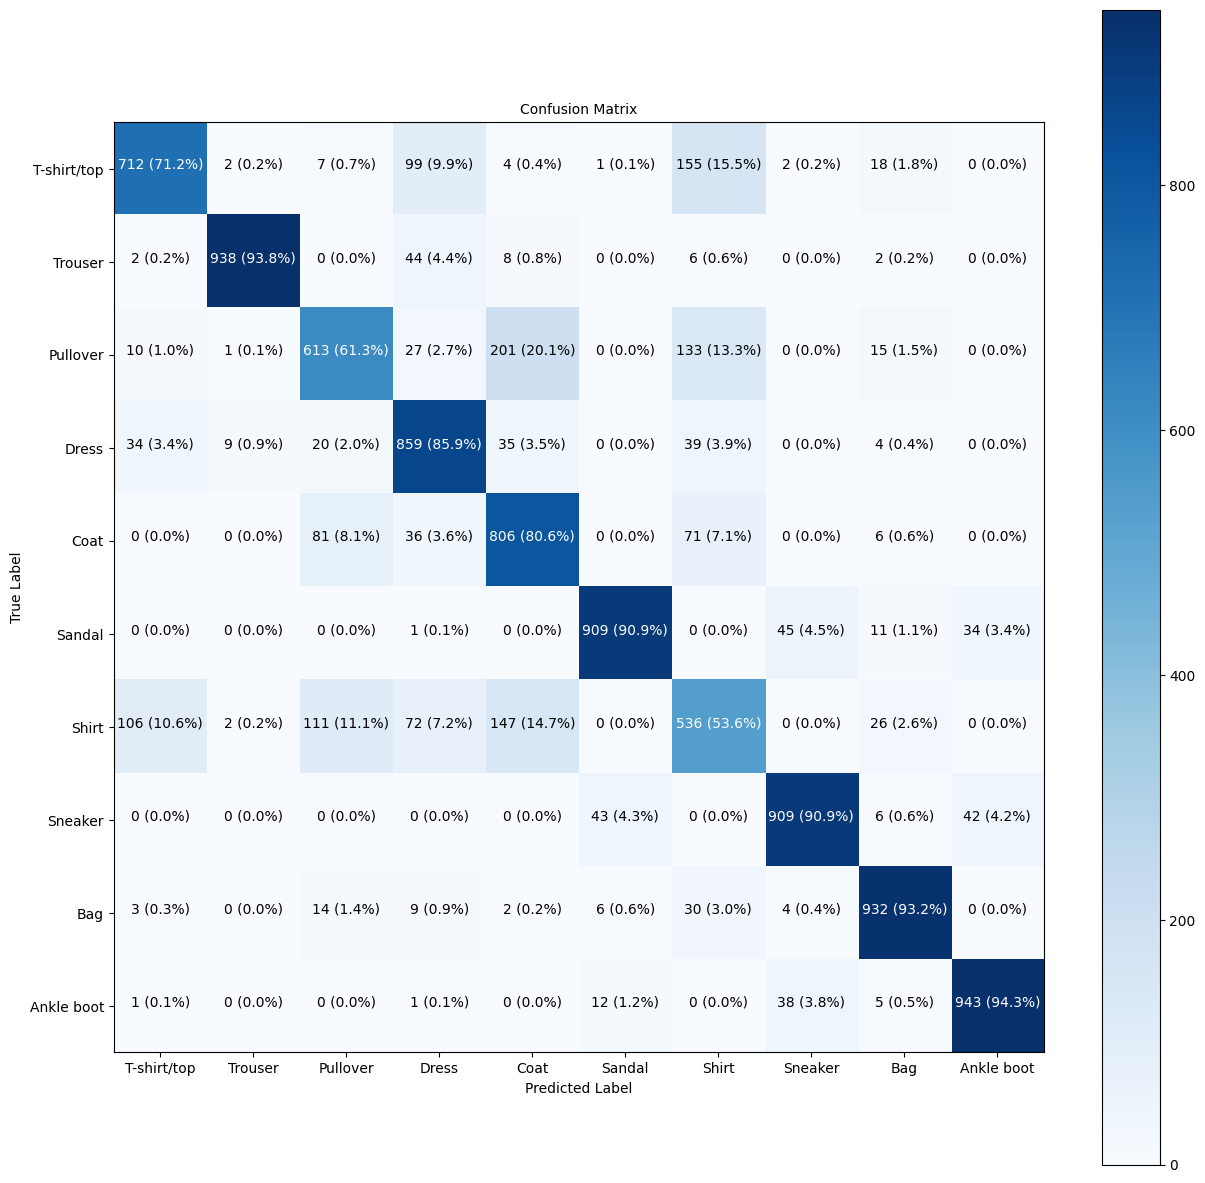

In [74]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [75]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.
  """
  #Set up random integer
  i = random.randint(0,len(images))

  #Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  ## Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 21ms/step


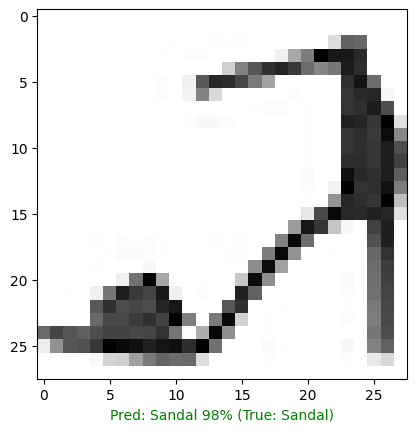

In [86]:
#Check out random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

##What patterns our model is learning

In [87]:
#Find the layers of our most recent layer
model_14.layers

In [88]:
weights,biases = model_14.layers[1].get_weights()

#Shapes
weights,weights.shape

(array([[ 0.200711  , -0.67070454,  0.5736163 ,  0.3615715 ],
        [-0.5306567 , -0.28889546,  0.58912116,  0.2869064 ],
        [-0.38546747, -0.7473822 ,  1.010792  ,  0.42723492],
        ...,
        [ 0.28558525,  0.07346123, -0.23193741,  0.06706304],
        [ 0.5060082 , -0.7466754 , -0.88769764,  0.20502116],
        [ 0.1298701 , -0.08383992, -0.35437346,  0.22453305]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

In [89]:
biases,biases.shape

(array([-0.22132367,  0.5510188 ,  0.45321843,  0.04824573], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

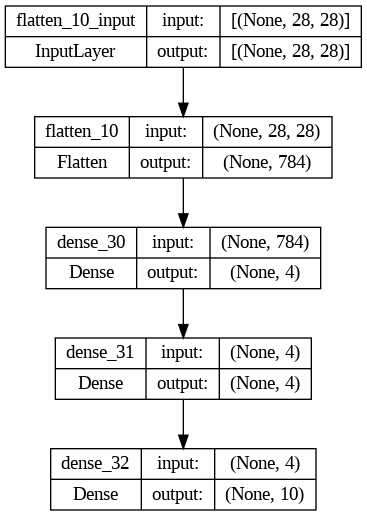

In [90]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)